In [1]:
import sqlite3
data_name = "biblio"

In [2]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()

cursor.execute(
    '''
    CREATE TABLE Book(
        id INT PRIMARY KEY NOT NULL,
        title TEXT,
        author TEXT,
        publish_year INT
    )
    '''
)

cursor.execute(
    '''
    INSERT INTO Book VALUES
    (1, 'Harry Potter and the Philosopher''s Stone', 'J. K. Rowling', 1997),
    (2, 'Методы решения задач в общем курсе физики, Механика', 'Корявов В.П.', 2007),
    (3, 'Batman: Gotham by Gaslight', 'Brian Augustyn, Mike Mignola', 1989),
    (4, 'Мёртвые души', 'Н. В. Гоголь', 1842),
    (5, 'The Running Man', 'Richard Bachman', 1982)
    '''
)

connection.commit()

In [3]:
cursor.execute(
    '''
    CREATE TABLE Reader(
        id INT PRIMARY KEY NOT NULL,
        name TEXT
    )
    '''
)

cursor.execute(
    '''
    INSERT INTO Reader VALUES
    (1, 'V.V. Petrovich'),
    (2, 'Alexanderr'),
    (3, 'Arkadiy Svidrigaylov'),
    (4, 'Vitalya'),
    (5, 'Noname')
    '''
)

In [4]:
cursor.execute(
    '''
    CREATE TABLE Record(
        id INT PRIMARY KEY NOT NULL,
        reader_id INT REFERENCES Readers(id) NOT NULL,
        book_id INT REFERENCES Books(id) NOT NULL,
        taking_date TEXT,
        returning_date TEXT
    )
    '''
)

In [5]:
cursor.execute(
    '''
    INSERT INTO Record VALUES
    (1, 3, 4, '1842-02-14', '1842-07-01'),
    (2, 4, 4, '1996-10-26', NULL),
    (3, 1, 2, '2006-06-13', '2006-06-14'),
    (4, 1, 1, '2006-06-14', '2006-06-15'),
    (5, 1, 3, '2006-06-15', '2006-07-20'),
    (6, 2, 5, '1985-10-11', '1987-12-25'),
    (7, 5, 3, '2001-03-15', NULL),
    (8, 5, 3, '2002-09-19', '2002-09-25')
    '''
)

In [6]:
connection.commit()
connection.close()

# 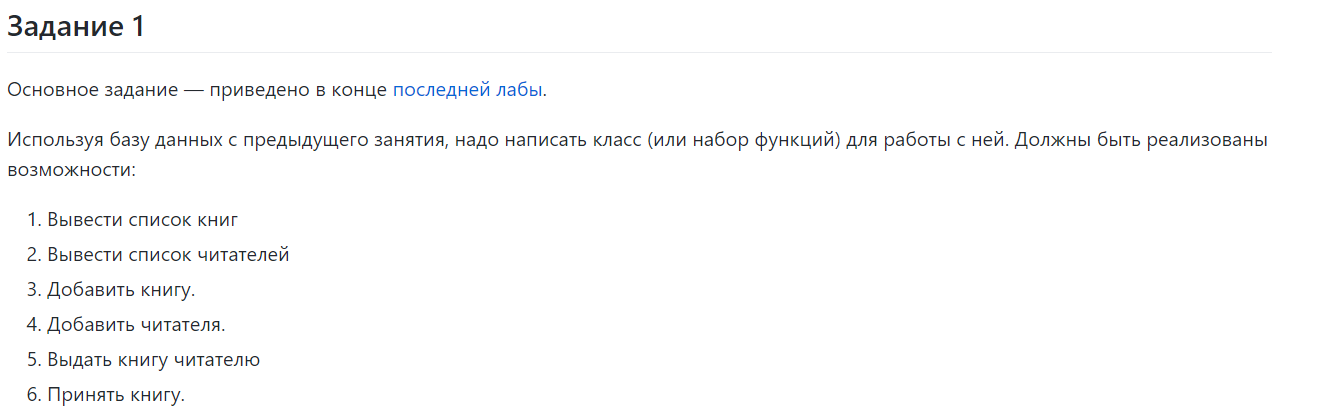


In [7]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()

# 1.Вывести список книг


In [8]:
cursor.execute("SELECT * FROM Book")
for i in cursor.execute("SELECT id, title FROM Book"):
    print(*i)

1 Harry Potter and the Philosopher's Stone
2 Методы решения задач в общем курсе физики, Механика
3 Batman: Gotham by Gaslight
4 Мёртвые души
5 The Running Man


In [9]:
connection.close()

# 2.Выводим список читателей

In [10]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()

In [11]:
cursor.execute("SELECT * FROM Reader")
for i in cursor.execute("SELECT * FROM Reader"):
    print(*i)

1 V.V. Petrovich
2 Alexanderr
3 Arkadiy Svidrigaylov
4 Vitalya
5 Noname


In [12]:
connection.close()

# 3.Добавляем книгу


In [13]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()

In [14]:
cursor.execute("SELECT Count(*) FROM Book")
max_id = cursor.fetchone()[0]

In [15]:
book_1 = [
    (max_id + 1, "The Crystal Horizon: Everest - The First Solo Ascent", "Reinhold Messner", 1989 ),    
]

connection.executemany(
    "INSERT INTO Book VALUES (?, ?, ?, ?)",
    book_1
)

In [16]:
cursor.execute("SELECT * FROM Book")
for i in cursor.execute("SELECT id, title FROM Book"):
    print(*i)

1 Harry Potter and the Philosopher's Stone
2 Методы решения задач в общем курсе физики, Механика
3 Batman: Gotham by Gaslight
4 Мёртвые души
5 The Running Man
6 The Crystal Horizon: Everest - The First Solo Ascent


In [17]:
connection.close()

# 4.Добавляем читателя


In [19]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()

cursor.execute("SELECT Count(*) FROM Reader")
max_id_R = cursor.fetchone()[0]

pearson_1 = [
    (max_id_R + 1, "Vadim Popovich" )   
]

connection.executemany(
    "INSERT INTO Reader VALUES (?, ?)",
    pearson_1
)

In [20]:
cursor.execute("SELECT * FROM Reader")
for i in cursor.execute("SELECT * FROM Reader"):
    print(*i)

1 V.V. Petrovich
2 Alexanderr
3 Arkadiy Svidrigaylov
4 Vitalya
5 Noname
6 Vadim Popovich


In [21]:

connection.close()

# 5.Выдать книгу читателю

In [22]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()

In [23]:
cursor.execute("SELECT Count(*) FROM Record")
max_id_Rec = cursor.fetchone()[0]
connection.close()

In [25]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()
#CREATE TABLE Record( id INT PRIMARY KEY NOT NULL, reader_id INT REFERENCES Readers(id) NOT NULL, 
#book_id INT REFERENCES Books(id) NOT NULL,
        #taking_date TEXT,
        #returning_date TEXT)


record6 = [
    (max_id_Rec + 1, 1, 3, '2222-03-13', None)   
]

connection.executemany(
    "INSERT INTO Record VALUES (?, ?, ?, ?, ?)",
    record6
)

In [26]:
cursor.execute("SELECT * FROM Record")
for i in cursor.execute("SELECT * FROM Record"):
    print(*i)

1 3 4 1842-02-14 1842-07-01
2 4 4 1996-10-26 None
3 1 2 2006-06-13 2006-06-14
4 1 1 2006-06-14 2006-06-15
5 1 3 2006-06-15 2006-07-20
6 2 5 1985-10-11 1987-12-25
7 5 3 2001-03-15 None
8 5 3 2002-09-19 2002-09-25
9 1 3 2222-03-13 None


In [27]:
connection.close()

# 6.Принять книгу

In [33]:
connection = sqlite3.connect(data_name)
cursor = connection.cursor()
#CREATE TABLE Record( id INT PRIMARY KEY NOT NULL, reader_id INT REFERENCES Readers(id) NOT NULL, 
#book_id INT REFERENCES Books(id) NOT NULL,
        #taking_date TEXT,
        #returning_date TEXT)


record6 = [
    (max_id_Rec + 1, 1, 3, '2222-03-13', '2232-03-15')   
]

connection.executemany(
    "INSERT INTO Record VALUES (?, ?, ?, ?, ?)",
    record6
)

In [34]:
cursor.execute("SELECT * FROM Record")
for i in cursor.execute("SELECT * FROM Record"):
    print(*i)

1 3 4 1842-02-14 1842-07-01
2 4 4 1996-10-26 None
3 1 2 2006-06-13 2006-06-14
4 1 1 2006-06-14 2006-06-15
5 1 3 2006-06-15 2006-07-20
6 2 5 1985-10-11 1987-12-25
7 5 3 2001-03-15 None
8 5 3 2002-09-19 2002-09-25
9 1 3 2222-03-13 2232-03-15


In [35]:
connection.close()